### Read Data Files

In [1]:
train <- read.csv('/Users/juhwikim/Desktop/MSDS/410 Supervised Learning/moneyball_train.csv')
test <- read.csv('/Users/juhwikim/Desktop/MSDS/410 Supervised Learning/moneyball_test.csv')

### Install R Packages

In [2]:
library(corrplot)
library(PerformanceAnalytics)

corrplot 0.89 loaded
Warning message:
“package ‘PerformanceAnalytics’ was built under R version 3.6.3”Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



### 1. Exploratory Data Analysis

In [7]:
head(train, n=5)

X,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,1,39,1445,194,39,13,143,842,NA,NA,NA,9364,84,927,5456,1011,NA
1,2,70,1339,219,22,190,685,1075,37,28,NA,1347,191,689,1082,193,155
2,3,86,1377,232,35,137,602,917,46,27,NA,1377,137,602,917,175,153
3,4,70,1387,209,38,96,451,922,43,30,NA,1396,97,454,928,164,156
4,5,82,1297,186,27,102,472,920,49,39,NA,1297,102,472,920,138,168


In [8]:
head(test, n=5)

X,INDEX,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,9,1209,170,33,83,447,1080,62,50,NA,1209,83,447,1080,140,156
1,10,1221,151,29,88,516,929,54,39,NA,1221,88,516,929,135,164
2,14,1395,183,29,93,509,816,59,47,NA,1395,93,509,816,156,153
3,47,1539,309,29,159,486,914,148,57,42,1539,159,486,914,124,154
4,60,1445,203,68,5,95,416,NA,NA,NA,3902,14,257,1123,616,130


In [9]:
str(train)

'data.frame':	2276 obs. of  18 variables:
 $ X               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ INDEX           : num  1 2 3 4 5 6 7 8 11 12 ...
 $ TARGET_WINS     : num  39 70 86 70 82 75 80 85 86 76 ...
 $ TEAM_BATTING_H  : num  1445 1339 1377 1387 1297 ...
 $ TEAM_BATTING_2B : num  194 219 232 209 186 200 179 171 197 213 ...
 $ TEAM_BATTING_3B : num  39 22 35 38 27 36 54 37 40 18 ...
 $ TEAM_BATTING_HR : num  13 190 137 96 102 92 122 115 114 96 ...
 $ TEAM_BATTING_BB : num  143 685 602 451 472 443 525 456 447 441 ...
 $ TEAM_BATTING_SO : num  842 1075 917 922 920 ...
 $ TEAM_BASERUN_SB : num  NA 37 46 43 49 107 80 40 69 72 ...
 $ TEAM_BASERUN_CS : num  NA 28 27 30 39 59 54 36 27 34 ...
 $ TEAM_BATTING_HBP: num  NA NA NA NA NA NA NA NA NA NA ...
 $ TEAM_PITCHING_H : num  9364 1347 1377 1396 1297 ...
 $ TEAM_PITCHING_HR: num  84 191 137 97 102 92 122 116 114 96 ...
 $ TEAM_PITCHING_BB: num  927 689 602 454 472 443 525 459 447 441 ...
 $ TEAM_PITCHING_SO: num  5456 1082 917 928 920 ...


In [10]:
summary(train)

       X              INDEX         TARGET_WINS     TEAM_BATTING_H
 Min.   :   0.0   Min.   :   1.0   Min.   :  0.00   Min.   : 891  
 1st Qu.: 568.8   1st Qu.: 630.8   1st Qu.: 71.00   1st Qu.:1383  
 Median :1137.5   Median :1270.5   Median : 82.00   Median :1454  
 Mean   :1137.5   Mean   :1268.5   Mean   : 80.79   Mean   :1469  
 3rd Qu.:1706.2   3rd Qu.:1915.5   3rd Qu.: 92.00   3rd Qu.:1537  
 Max.   :2275.0   Max.   :2535.0   Max.   :146.00   Max.   :2554  
                                                                  
 TEAM_BATTING_2B TEAM_BATTING_3B  TEAM_BATTING_HR  TEAM_BATTING_BB
 Min.   : 69.0   Min.   :  0.00   Min.   :  0.00   Min.   :  0.0  
 1st Qu.:208.0   1st Qu.: 34.00   1st Qu.: 42.00   1st Qu.:451.0  
 Median :238.0   Median : 47.00   Median :102.00   Median :512.0  
 Mean   :241.2   Mean   : 55.25   Mean   : 99.61   Mean   :501.6  
 3rd Qu.:273.0   3rd Qu.: 72.00   3rd Qu.:147.00   3rd Qu.:580.0  
 Max.   :458.0   Max.   :223.00   Max.   :264.00   Max.   :878

In [14]:
apply(train, 2, sd)

X            INDEX      TARGET_WINS   TEAM_BATTING_H 
       657.16893        736.34904         15.75215        144.59120 
 TEAM_BATTING_2B  TEAM_BATTING_3B  TEAM_BATTING_HR  TEAM_BATTING_BB 
        46.80141         27.93856         60.54687        122.67086 
 TEAM_BATTING_SO  TEAM_BASERUN_SB  TEAM_BASERUN_CS TEAM_BATTING_HBP 
              NA               NA               NA               NA 
 TEAM_PITCHING_H TEAM_PITCHING_HR TEAM_PITCHING_BB TEAM_PITCHING_SO 
      1406.84293         61.29875        166.35736               NA 
 TEAM_FIELDING_E TEAM_FIELDING_DP 
       227.77097               NA

* **There are 2276 rows of records and 16 variables (TARGET_WINS through TEAM_FIELDING_DP)**
* **Following Columns have NULL values that will need to be corrected: TEAM_BATTING_SO  TEAM_BASERUN_SB TEAM_BASERUN_CS TEAM_BATTING_HBP TEAM_PITCHING_SO TEAM_FIELDING_DP**

* **Before imputing NAs, I will examine Z-Scores to gain understandings of extreme outliers (>3)**


In [17]:
train_ZScore <- train
train_ZScore$TARGET_WINS_ZS <- (train_ZScore$TARGET_WINS - mean(train_ZScore$TARGET_WINS, na.rm = TRUE))/sd(train_ZScore$TARGET_WINS, na.rm = TRUE)
train_ZScore$TEAM_BATTING_H_ZS <- (train_ZScore$TEAM_BATTING_H - mean(train_ZScore$TEAM_BATTING_H,  na.rm = TRUE))/sd(train_ZScore$TEAM_BATTING_H,  na.rm = TRUE)
train_ZScore$TEAM_BATTING_2B_ZS <- (train_ZScore$TEAM_BATTING_2B - mean(train_ZScore$TEAM_BATTING_2B,  na.rm = TRUE))/sd(train_ZScore$TEAM_BATTING_2B,  na.rm = TRUE)
train_ZScore$TEAM_BATTING_3B_ZS <- (train_ZScore$TEAM_BATTING_3B - mean(train_ZScore$TEAM_BATTING_3B, na.rm = TRUE))/sd(train_ZScore$TEAM_BATTING_3B,  na.rm = TRUE)
train_ZScore$TEAM_BATTING_HR_ZS <- (train_ZScore$TEAM_BATTING_HR - mean(train_ZScore$TEAM_BATTING_HR,  na.rm = TRUE))/sd(train_ZScore$TEAM_BATTING_HR,  na.rm = TRUE)
train_ZScore$TEAM_BATTING_BB_ZS <- (train_ZScore$TEAM_BATTING_BB - mean(train_ZScore$TEAM_BATTING_BB,  na.rm = TRUE))/sd(train_ZScore$TEAM_BATTING_BB,  na.rm = TRUE)
train_ZScore$TEAM_BATTING_SO_ZS <- (train_ZScore$TEAM_BATTING_SO - mean(train_ZScore$TEAM_BATTING_SO,  na.rm = TRUE))/sd(train_ZScore$TEAM_BATTING_SO,  na.rm = TRUE)
train_ZScore$TEAM_BASERUN_SB_ZS <- (train_ZScore$TEAM_BASERUN_SB - mean(train_ZScore$TEAM_BASERUN_SB,  na.rm = TRUE))/sd(train_ZScore$TEAM_BASERUN_SB,  na.rm = TRUE)
train_ZScore$TEAM_BASERUN_CS_ZS <- (train_ZScore$TEAM_BASERUN_CS - mean(train_ZScore$TEAM_BASERUN_CS,  na.rm = TRUE))/sd(train_ZScore$TEAM_BASERUN_CS,  na.rm = TRUE)
train_ZScore$TEAM_BATTING_HBP_ZS <- (train_ZScore$TEAM_BATTING_HBP - mean(train_ZScore$TEAM_BATTING_HBP,  na.rm = TRUE))/sd(train_ZScore$TEAM_BATTING_HBP,  na.rm = TRUE)
train_ZScore$TEAM_PITCHING_H_ZS <- (train_ZScore$TEAM_PITCHING_H - mean(train_ZScore$TEAM_PITCHING_H,  na.rm = TRUE))/sd(train_ZScore$TEAM_PITCHING_H,  na.rm = TRUE)
train_ZScore$TEAM_PITCHING_HR_ZS <- (train_ZScore$TEAM_PITCHING_HR - mean(train_ZScore$TEAM_PITCHING_HR, na.rm = TRUE))/sd(train_ZScore$TEAM_PITCHING_HR,  na.rm = TRUE)
train_ZScore$TEAM_PITCHING_BB_ZS <- (train_ZScore$TEAM_PITCHING_BB - mean(train_ZScore$TEAM_PITCHING_BB,  na.rm = TRUE))/sd(train_ZScore$TEAM_PITCHING_BB,  na.rm = TRUE)
train_ZScore$TEAM_PITCHING_SO_ZS <- (train_ZScore$TEAM_PITCHING_SO - mean(train_ZScore$TEAM_PITCHING_SO,  na.rm = TRUE))/sd(train_ZScore$TEAM_PITCHING_SO,  na.rm = TRUE)
train_ZScore$TEAM_FIELDING_E_ZS <- (train_ZScore$TEAM_FIELDING_E - mean(train_ZScore$TEAM_FIELDING_E,  na.rm = TRUE))/sd(train_ZScore$TEAM_FIELDING_E,  na.rm = TRUE)
train_ZScore$TEAM_FIELDING_DP_ZS <- (train_ZScore$TEAM_FIELDING_DP - mean(train_ZScore$TEAM_FIELDING_DP,  na.rm = TRUE))/sd(train_ZScore$TEAM_FIELDING_DP,  na.rm = TRUE)

In [19]:
head(train_ZScore,n=5)

X,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,...,TEAM_BATTING_SO_ZS,TEAM_BASERUN_SB_ZS,TEAM_BASERUN_CS_ZS,TEAM_BATTING_HBP_ZS,TEAM_PITCHING_H_ZS,TEAM_PITCHING_HR_ZS,TEAM_PITCHING_BB_ZS,TEAM_PITCHING_SO_ZS,TEAM_FIELDING_E_ZS,TEAM_FIELDING_DP_ZS
0,1,39,1445,194,39,13,143,842,NA,...,0.4281020,NA,NA,NA,5.3913549,-0.35398104,2.2481247,8.3861780,3.3565266,NA
1,2,70,1339,219,22,190,685,1075,37,...,1.3656281,-0.9996652,-1.0804797,NA,-0.3072201,1.39156851,0.8174696,0.4778100,-0.2348002,0.3283739
2,3,86,1377,232,35,137,602,917,46,...,0.7298808,-0.8971492,-1.1240406,NA,-0.2858958,0.51063696,0.2944991,0.1794833,-0.3138269,0.2521148
3,4,70,1387,209,38,96,451,922,43,...,0.7499994,-0.9313212,-0.9933578,NA,-0.2723904,-0.14190492,-0.5951520,0.1993718,-0.3621211,0.3665034
4,5,82,1297,186,27,102,472,920,49,...,0.7419520,-0.8629772,-0.6013092,NA,-0.3427607,-0.06033719,-0.4869512,0.1849075,-0.4762708,0.8240579


In [23]:
str(train_ZScore)

'data.frame':	2276 obs. of  34 variables:
 $ X                  : int  0 1 2 3 4 5 6 7 8 9 ...
 $ INDEX              : num  1 2 3 4 5 6 7 8 11 12 ...
 $ TARGET_WINS        : num  39 70 86 70 82 75 80 85 86 76 ...
 $ TEAM_BATTING_H     : num  1445 1339 1377 1387 1297 ...
 $ TEAM_BATTING_2B    : num  194 219 232 209 186 200 179 171 197 213 ...
 $ TEAM_BATTING_3B    : num  39 22 35 38 27 36 54 37 40 18 ...
 $ TEAM_BATTING_HR    : num  13 190 137 96 102 92 122 115 114 96 ...
 $ TEAM_BATTING_BB    : num  143 685 602 451 472 443 525 456 447 441 ...
 $ TEAM_BATTING_SO    : num  842 1075 917 922 920 ...
 $ TEAM_BASERUN_SB    : num  NA 37 46 43 49 107 80 40 69 72 ...
 $ TEAM_BASERUN_CS    : num  NA 28 27 30 39 59 54 36 27 34 ...
 $ TEAM_BATTING_HBP   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ TEAM_PITCHING_H    : num  9364 1347 1377 1396 1297 ...
 $ TEAM_PITCHING_HR   : num  84 191 137 97 102 92 122 116 114 96 ...
 $ TEAM_PITCHING_BB   : num  927 689 602 454 472 443 525 459 447 441 ...
 $ TEAM

[1] 5.1 4.1 4.1 2.1

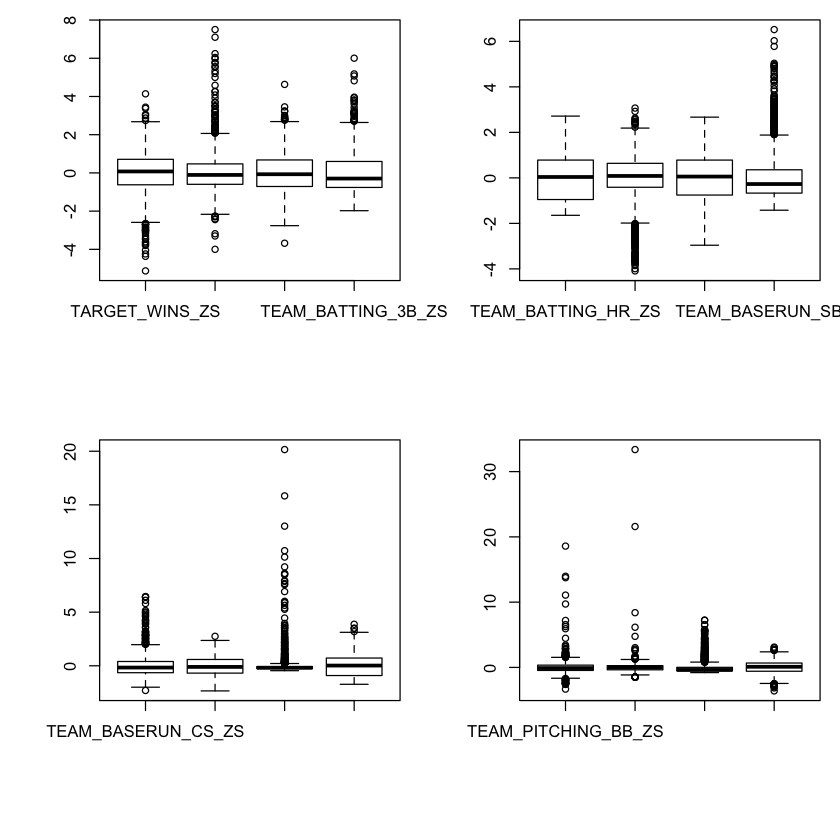

In [40]:
par("mar")
par(mar=c(7,5,1,1), mfrow=c(2,2))
boxplot(train_ZScore[19:22])
boxplot(train_ZScore[23:26])
boxplot(train_ZScore[27:30])
boxplot(train_ZScore[31:34])

* **Majority of the variables include numbers of outliers with extreme Z-Scores (More than +3 or -3 from mean)** 

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



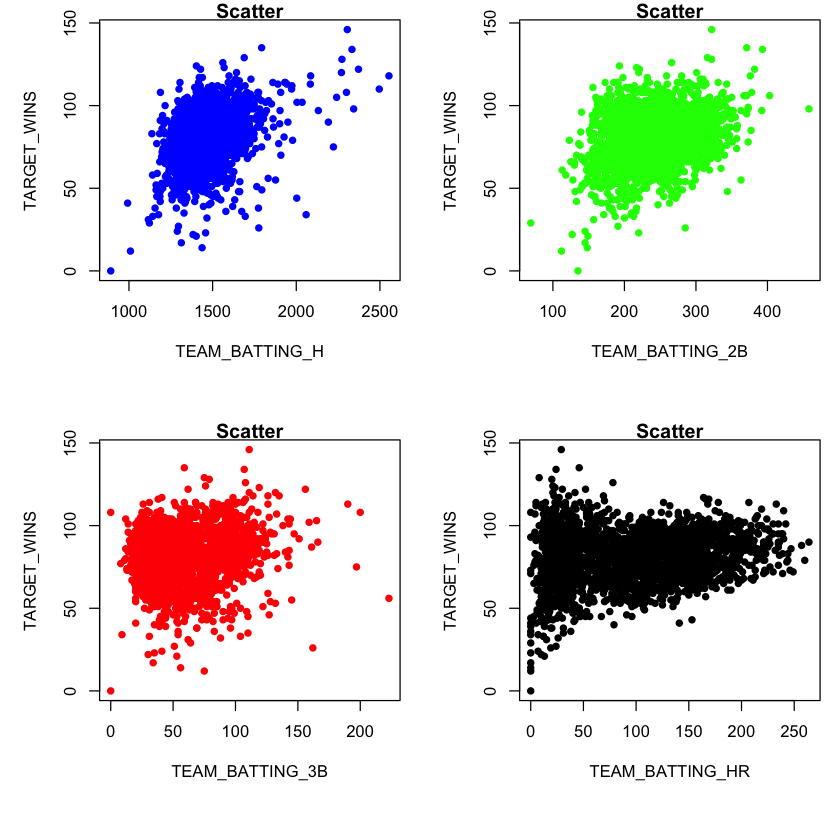

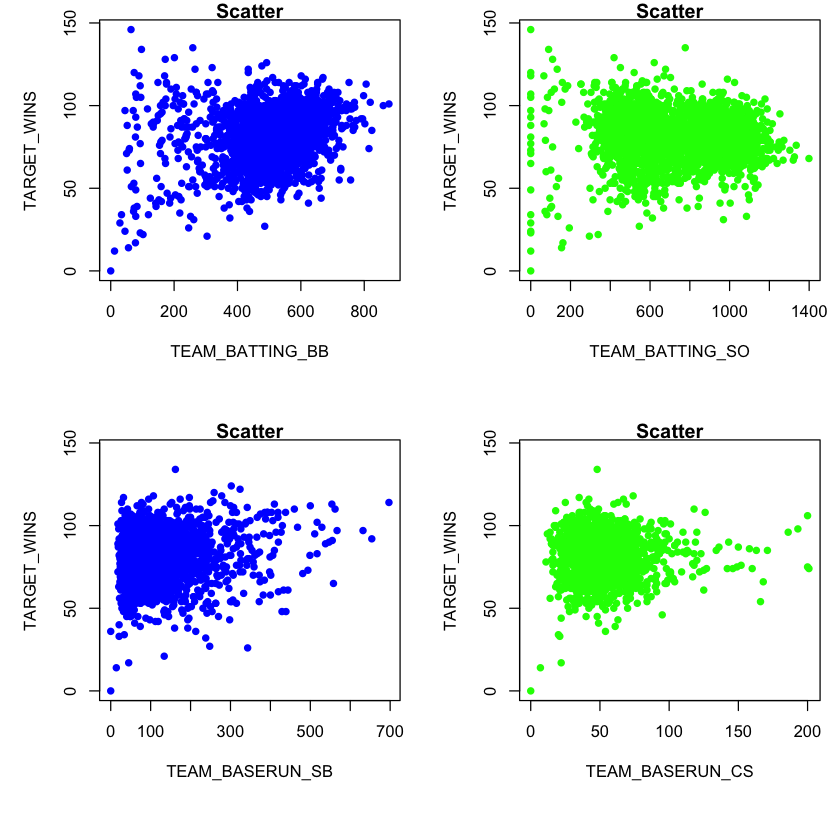

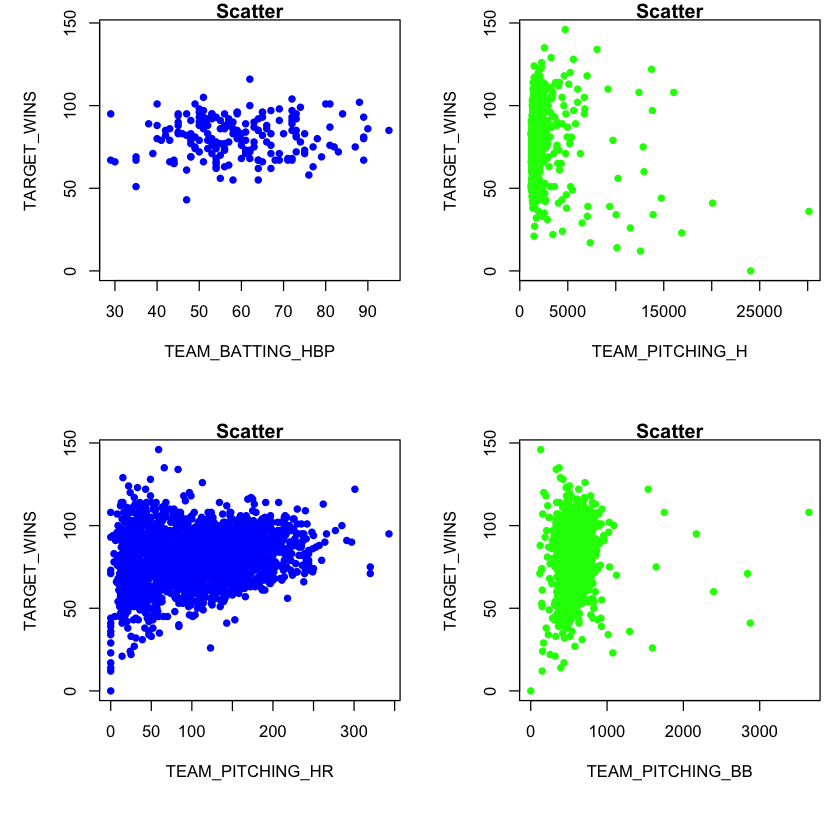

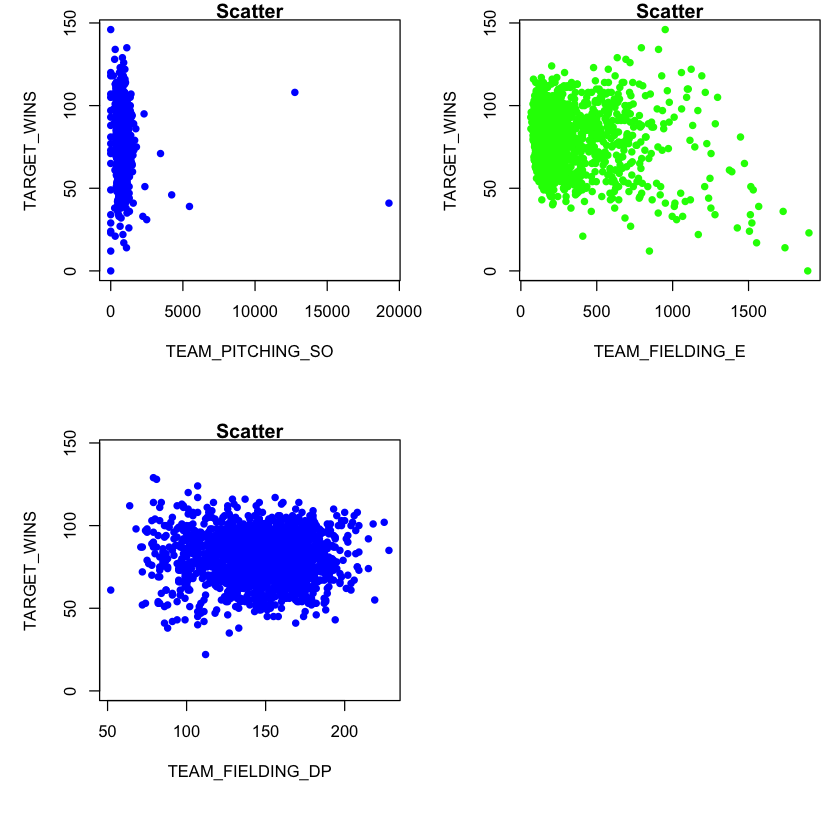

In [43]:
attach(mtcars)
par(mar=c(7,5,1,1), mfrow=c(2,2))
plot(train$TEAM_BATTING_H, train$TARGET_WINS, main = "Scatter", col = "blue",
     cex = 1.0, pch = 16,  xlab = "TEAM_BATTING_H", ylab = "TARGET_WINS")
plot(train$TEAM_BATTING_2B, train$TARGET_WINS, main = "Scatter", col = "green",
     cex = 1.0, pch = 16,  xlab = "TEAM_BATTING_2B", ylab = "TARGET_WINS")
plot(train$TEAM_BATTING_3B, train$TARGET_WINS, main = "Scatter", col = "red",
     cex = 1.0, pch = 16,  xlab = "TEAM_BATTING_3B", ylab = "TARGET_WINS")
plot(train$TEAM_BATTING_HR, train$TARGET_WINS, main = "Scatter", col = "black",
     cex = 1.0, pch = 16,  xlab = "TEAM_BATTING_HR", ylab = "TARGET_WINS")

par(mar=c(7,5,1,1), mfrow=c(2,2))
plot(train$TEAM_BATTING_BB, train$TARGET_WINS, main = "Scatter", col = "blue",
     cex = 1.0, pch = 16,  xlab = "TEAM_BATTING_BB", ylab = "TARGET_WINS")
plot(train$TEAM_BATTING_SO, train$TARGET_WINS, main = "Scatter", col = "green",
     cex = 1.0, pch = 16,  xlab = "TEAM_BATTING_SO", ylab = "TARGET_WINS")
plot(train$TEAM_BASERUN_SB, train$TARGET_WINS, main = "Scatter", col = "blue",
     cex = 1.0, pch = 16,  xlab = "TEAM_BASERUN_SB", ylab = "TARGET_WINS")
plot(train$TEAM_BASERUN_CS, train$TARGET_WINS, main = "Scatter", col = "green",
     cex = 1.0, pch = 16,  xlab = "TEAM_BASERUN_CS", ylab = "TARGET_WINS")

par(mar=c(7,5,1,1), mfrow=c(2,2))
plot(train$TEAM_BATTING_HBP, train$TARGET_WINS, main = "Scatter", col = "blue",
     cex = 1.0, pch = 16,  xlab = "TEAM_BATTING_HBP", ylab = "TARGET_WINS")
plot(train$TEAM_PITCHING_H, train$TARGET_WINS, main = "Scatter", col = "green",
     cex = 1.0, pch = 16,  xlab = "TEAM_PITCHING_H", ylab = "TARGET_WINS")
plot(train$TEAM_PITCHING_HR, train$TARGET_WINS, main = "Scatter", col = "blue",
     cex = 1.0, pch = 16,  xlab = "TEAM_PITCHING_HR", ylab = "TARGET_WINS")
plot(train$TEAM_PITCHING_BB, train$TARGET_WINS, main = "Scatter", col = "green",
     cex = 1.0, pch = 16,  xlab = "TEAM_PITCHING_BB", ylab = "TARGET_WINS")

par(mar=c(7,5,1,1))
plot(train$TEAM_PITCHING_SO, train$TARGET_WINS, main = "Scatter", col = "blue",
     cex = 1.0, pch = 16,  xlab = "TEAM_PITCHING_SO", ylab = "TARGET_WINS")
plot(train$TEAM_FIELDING_E, train$TARGET_WINS, main = "Scatter", col = "green",
     cex = 1.0, pch = 16,  xlab = "TEAM_FIELDING_E", ylab = "TARGET_WINS")
plot(train$TEAM_FIELDING_DP, train$TARGET_WINS, main = "Scatter", col = "blue",
     cex = 1.0, pch = 16,  xlab = "TEAM_FIELDING_DP", ylab = "TARGET_WINS")

* **First, I will replace missing values with Median of non-missing values for each variable.**

In [44]:
# Replacing NAs with Median in Train File
train$TEAM_BATTING_SO[is.na(train$TEAM_BATTING_SO)] <- median(train$TEAM_BATTING_SO, trim = 0, na.rm = TRUE)
train$TEAM_BASERUN_SB[is.na(train$TEAM_BASERUN_SB)] <- median(train$TEAM_BASERUN_SB, trim = 0, na.rm = TRUE)
train$TEAM_BASERUN_CS[is.na(train$TEAM_BASERUN_CS)] <- median(train$TEAM_BASERUN_CS, trim = 0, na.rm = TRUE)
train$TEAM_BATTING_HBP[is.na(train$TEAM_BATTING_HBP)] <- median(train$TEAM_BATTING_HBP, trim = 0, na.rm = TRUE)
train$TEAM_PITCHING_SO[is.na(train$TEAM_PITCHING_SO)] <- median(train$TEAM_PITCHING_SO, trim = 0, na.rm = TRUE)
train$TEAM_FIELDING_DP[is.na(train$TEAM_FIELDING_DP)] <- median(train$TEAM_FIELDING_DP, trim = 0, na.rm = TRUE)

In [45]:
# Replacing NAs with Median in Test File
test$TEAM_BATTING_SO[is.na(test$TEAM_BATTING_SO)] <- median(test$TEAM_BATTING_SO, trim = 0, na.rm = TRUE)
test$TEAM_BASERUN_SB[is.na(test$TEAM_BASERUN_SB)] <- median(test$TEAM_BASERUN_SB, trim = 0, na.rm = TRUE)
test$TEAM_BASERUN_CS[is.na(test$TEAM_BASERUN_CS)] <- median(test$TEAM_BASERUN_CS, trim = 0, na.rm = TRUE)
test$TEAM_BATTING_HBP[is.na(test$TEAM_BATTING_HBP)] <- median(test$TEAM_BATTING_HBP, trim = 0, na.rm = TRUE)
test$TEAM_PITCHING_SO[is.na(test$TEAM_PITCHING_SO)] <- median(test$TEAM_PITCHING_SO, trim = 0, na.rm = TRUE)
test$TEAM_FIELDING_DP[is.na(test$TEAM_FIELDING_DP)] <- median(test$TEAM_FIELDING_DP, trim = 0, na.rm = TRUE)

* **In Moneyball, there were three important metrics: Batting Average, On Base Percentage, and Slugging Percentage.**
* **Unfortunately, "At Bats" data is not available to calculate above metrics, but to facilitate further analysis, I will create following new metrics:**

1. TEAM_BATTING_1B: First Base by batters **Formula**: TEAM_BATTING_H - TEAM_BATTING_2B - TEAM_BATTING_3B - TEAM_BATTING_HR
2. TEAM_BATTING_H_RATIO : Overall Ratio of Hit compared to Batter Strikeout **Formula**: TEAM_BATTING_H / (TEAM_BATTING_H + TEAM_BATTING_BB + TEAM_BATTING_HBP + TEAM_BATTING_SO)
3. TEAM_BATTING_WALK: Overall Walks by Batters and Batters hit by Pitch **Formula**: TEAM_BATTING_BB + TEAM_BATTING_HBP
4. TEAM_BASERUN_SB_RATE: Ratio of stealing base **Formula**: TEAM_BASERUN_SB / (TEAM_BASERUN_SB + TEAM_BASERUN_CS)
5. TEAM_PITCHING_SO_RATIO : Ratio of successful Strikeout compared to H/HR/Walks allowed by Pitcher **Formula**: TEAM_PITCHING_SO / (TEAM_PITCHING_SO + TEAM_PITCHING_BB + TEAM_PITCHING_H + TEAM_PITCHING_HR)


In [46]:
train$TEAM_BATTING_1B <- train$TEAM_BATTING_H-train$TEAM_BATTING_2B-train$TEAM_BATTING_3B-train$TEAM_BATTING_HR
train$TEAM_BATTING_H_RATIO <- train$TEAM_BATTING_H/(train$TEAM_BATTING_H+train$TEAM_BATTING_BB+train$TEAM_BATTING_HBP+train$TEAM_BATTING_SO)
train$TEAM_BATTING_WALK <- (train$TEAM_BATTING_BB+train$TEAM_BATTING_HBP)
train$TEAM_BASERUN_SB_RATE <- train$TEAM_BASERUN_SB/(train$TEAM_BASERUN_SB+train$TEAM_BASERUN_CS)
train$TEAM_PITCHING_SO_RATIO <- train$TEAM_PITCHING_SO/(train$TEAM_PITCHING_SO+train$TEAM_PITCHING_BB+train$TEAM_PITCHING_H+train$TEAM_PITCHING_HR)

In [47]:
##Adding new variables to Test file
test$TEAM_BATTING_1B <- test$TEAM_BATTING_H-test$TEAM_BATTING_2B-test$TEAM_BATTING_3B-test$TEAM_BATTING_HR
test$TEAM_BATTING_H_RATIO <- test$TEAM_BATTING_H/(test$TEAM_BATTING_H+test$TEAM_BATTING_BB+test$TEAM_BATTING_HBP+test$TEAM_BATTING_SO)
test$TEAM_BATTING_WALK <- (test$TEAM_BATTING_BB+test$TEAM_BATTING_HBP)
test$TEAM_BASERUN_SB_RATE <- test$TEAM_BASERUN_SB/(test$TEAM_BASERUN_SB+test$TEAM_BASERUN_CS)
test$TEAM_PITCHING_SO_RATIO <- test$TEAM_PITCHING_SO/(test$TEAM_PITCHING_SO+test$TEAM_PITCHING_BB+test$TEAM_PITCHING_H+test$TEAM_PITCHING_HR)

In [48]:
summary(train)

       X              INDEX         TARGET_WINS     TEAM_BATTING_H
 Min.   :   0.0   Min.   :   1.0   Min.   :  0.00   Min.   : 891  
 1st Qu.: 568.8   1st Qu.: 630.8   1st Qu.: 71.00   1st Qu.:1383  
 Median :1137.5   Median :1270.5   Median : 82.00   Median :1454  
 Mean   :1137.5   Mean   :1268.5   Mean   : 80.79   Mean   :1469  
 3rd Qu.:1706.2   3rd Qu.:1915.5   3rd Qu.: 92.00   3rd Qu.:1537  
 Max.   :2275.0   Max.   :2535.0   Max.   :146.00   Max.   :2554  
                                                                  
 TEAM_BATTING_2B TEAM_BATTING_3B  TEAM_BATTING_HR  TEAM_BATTING_BB
 Min.   : 69.0   Min.   :  0.00   Min.   :  0.00   Min.   :  0.0  
 1st Qu.:208.0   1st Qu.: 34.00   1st Qu.: 42.00   1st Qu.:451.0  
 Median :238.0   Median : 47.00   Median :102.00   Median :512.0  
 Mean   :241.2   Mean   : 55.25   Mean   : 99.61   Mean   :501.6  
 3rd Qu.:273.0   3rd Qu.: 72.00   3rd Qu.:147.00   3rd Qu.:580.0  
 Max.   :458.0   Max.   :223.00   Max.   :264.00   Max.   :878

In [49]:
#BASERUN_SB_RATE returned one NA value
which(is.na(train$TEAM_BASERUN_SB_RATE))
train[1211,] #NA value occured due to dividing 0 by 0 
train$TEAM_BASERUN_SB_RATE[is.na(train$TEAM_BASERUN_SB_RATE)] <- 0 #Change NA value with 0

[1] 1211

,X,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,...,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP,TEAM_BATTING_1B,TEAM_BATTING_H_RATIO,TEAM_BATTING_WALK,TEAM_BASERUN_SB_RATE,TEAM_PITCHING_SO_RATIO
1211,1210,1347,0,891,135,0,0,0,0,0,...,0,0,0,1890,149,756,0.938883,58,NaN,0


In [70]:
#Replicate the step to Test file
which(is.na(test$TEAM_BASERUN_SB_RATE))
test[153,] #NA value occured due to dividing 0 by 0 
test$TEAM_BASERUN_SB_RATE[is.na(test$TEAM_BASERUN_SB_RATE)] <- 0 #Change NA value with 0

[1] 153

,X,INDEX,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,...,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP,TEAM_BATTING_1B,TEAM_BATTING_H_RATIO,TEAM_BATTING_WALK,TEAM_BASERUN_SB_RATE,TEAM_PITCHING_SO_RATIO
153,152,1495,1546,44,29,0,15,44,0,0,...,0,221,648,1473,148,1473,0.9274145,77,NaN,0.02741465


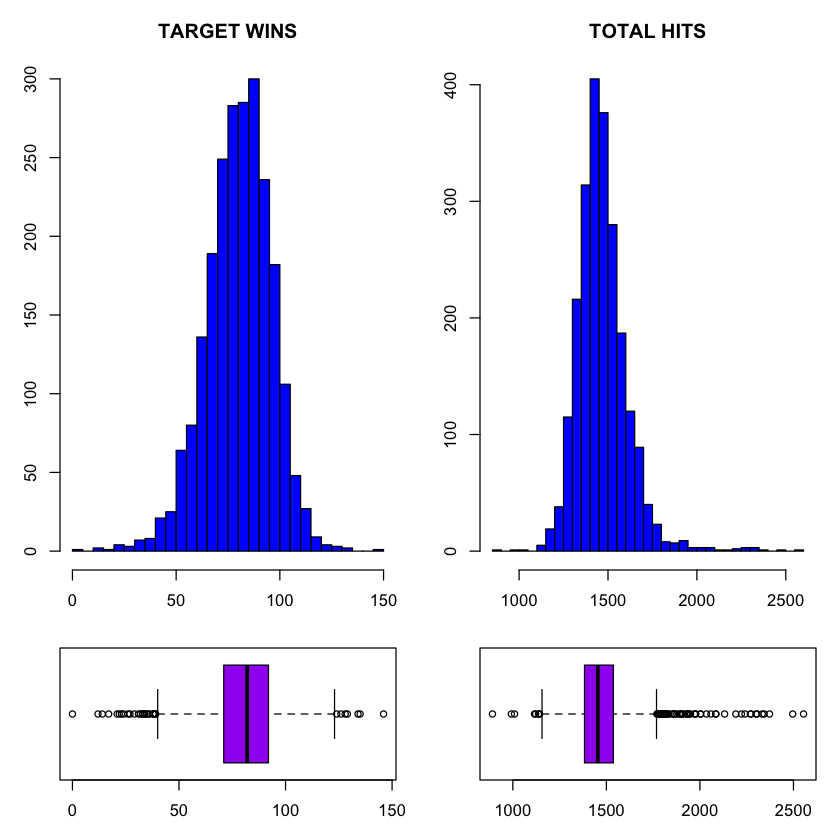

In [53]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TARGET_WINS, main="TARGET WINS", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_BATTING_H, main="TOTAL HITS", breaks=30, col="Blue")
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TARGET_WINS, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_BATTING_H, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))


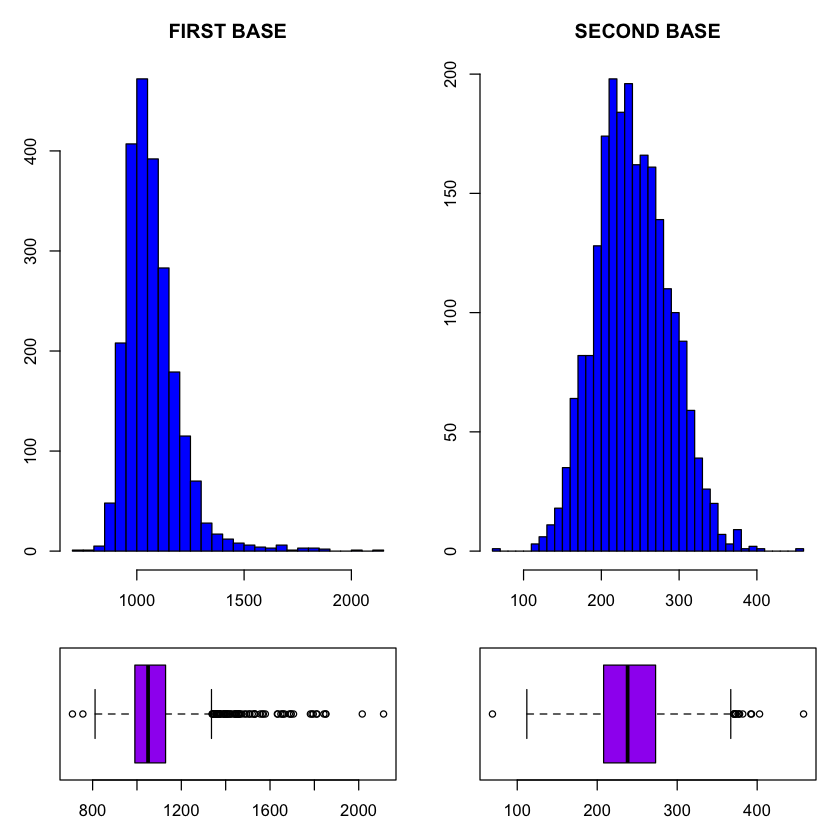

In [54]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TEAM_BATTING_1B, main="FIRST BASE", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_BATTING_2B, main="SECOND BASE", breaks=30, col="Blue")
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TEAM_BATTING_1B, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_BATTING_2B, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))

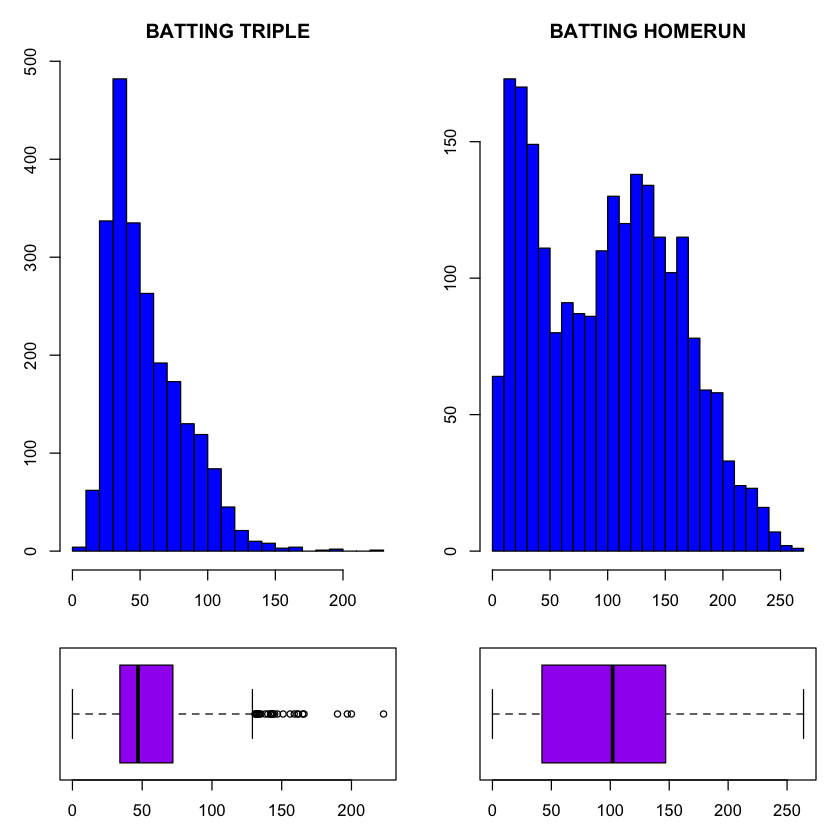

In [55]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TEAM_BATTING_3B, main="BATTING TRIPLE", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_BATTING_HR, main="BATTING HOMERUN", breaks=30, col="Blue")
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TEAM_BATTING_3B, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_BATTING_HR, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))

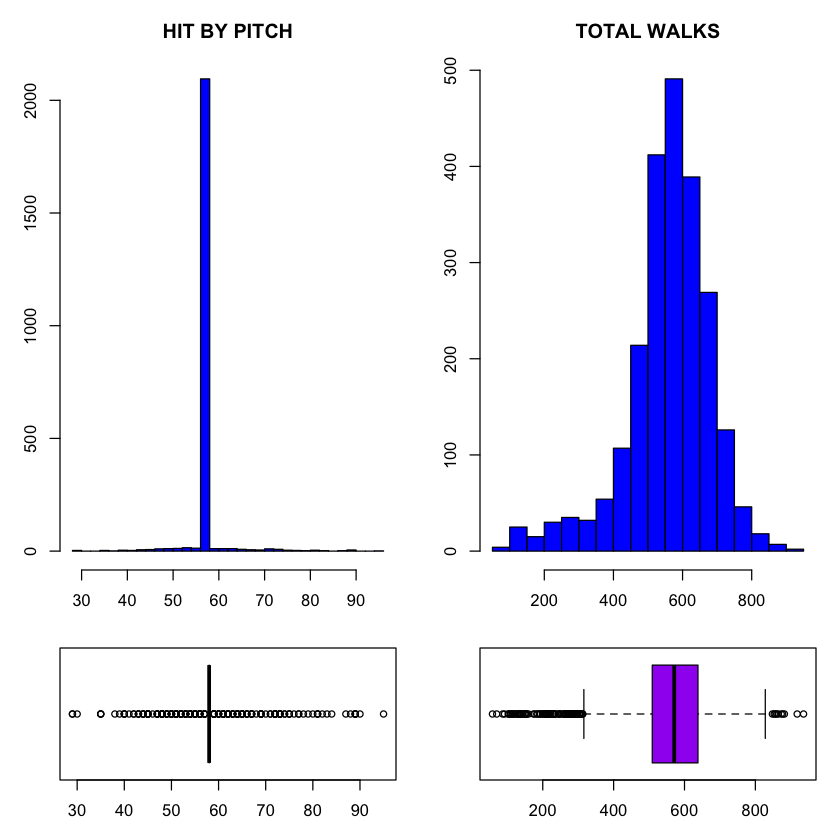

In [58]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TEAM_BATTING_HBP, main="HIT BY PITCH", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_BATTING_WALK, main="TOTAL WALKS", breaks=30, col="Blue")
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TEAM_BATTING_HBP, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_BATTING_WALK, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))

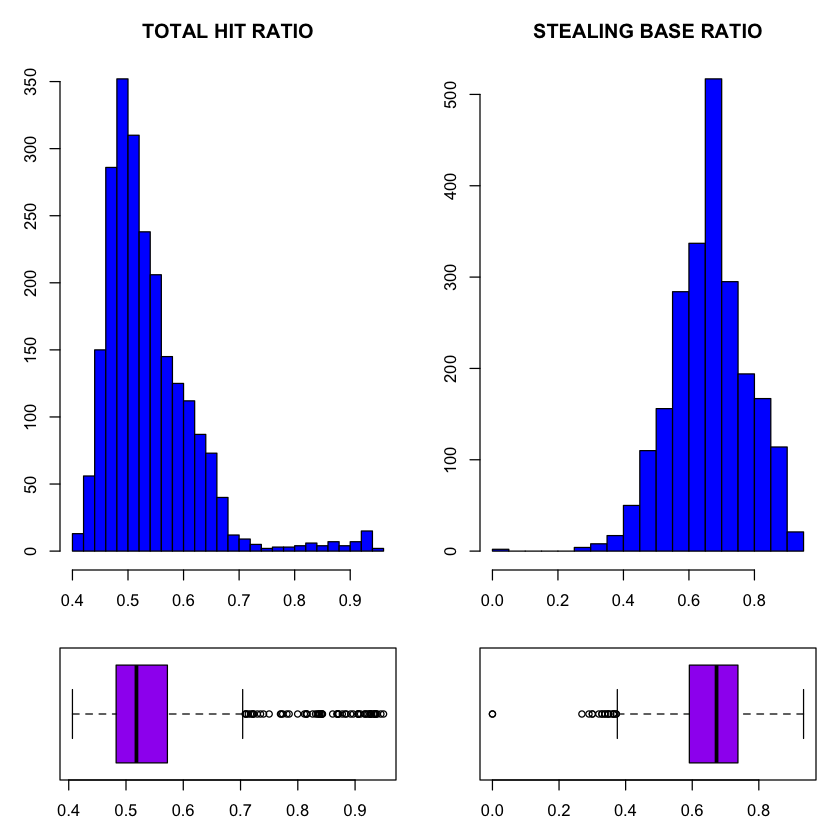

In [59]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TEAM_BATTING_H_RATIO, main="TOTAL HIT RATIO", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_BASERUN_SB_RATE, main="STEALING BASE RATIO", breaks=30, col="Blue")
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TEAM_BATTING_H_RATIO, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_BASERUN_SB_RATE, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))

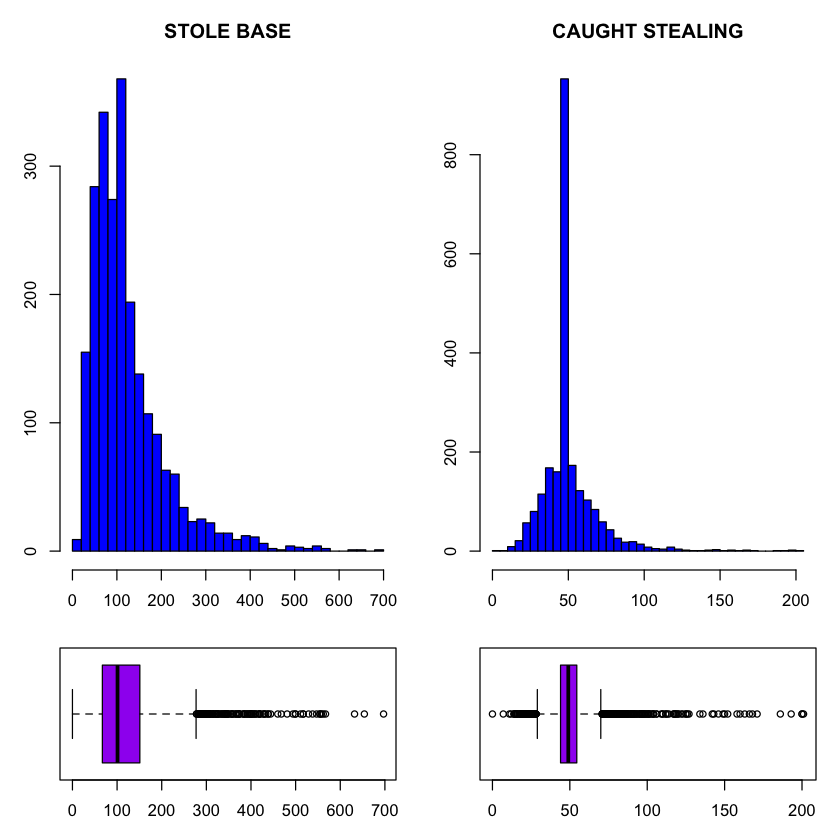

In [60]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TEAM_BASERUN_SB, main="STOLE BASE", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_BASERUN_CS, main="CAUGHT STEALING", breaks=30, col="Blue")
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TEAM_BASERUN_SB, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_BASERUN_CS, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))

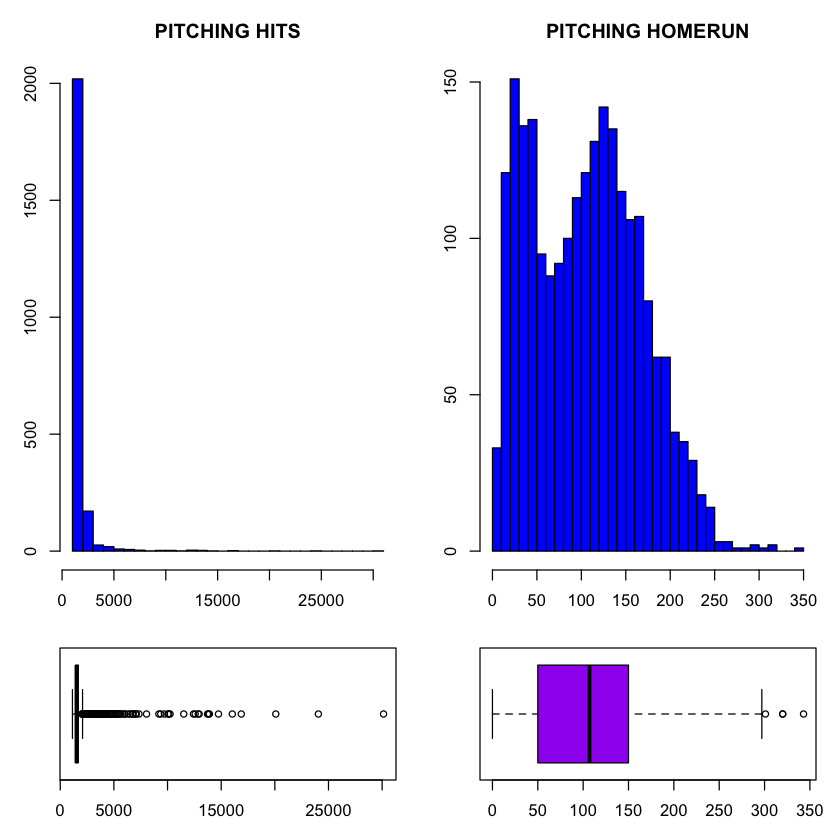

In [62]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TEAM_PITCHING_H, main="PITCHING HITS", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_PITCHING_HR, main="PITCHING HOMERUN", breaks=30, col="Blue")
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TEAM_PITCHING_H, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_PITCHING_HR, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))

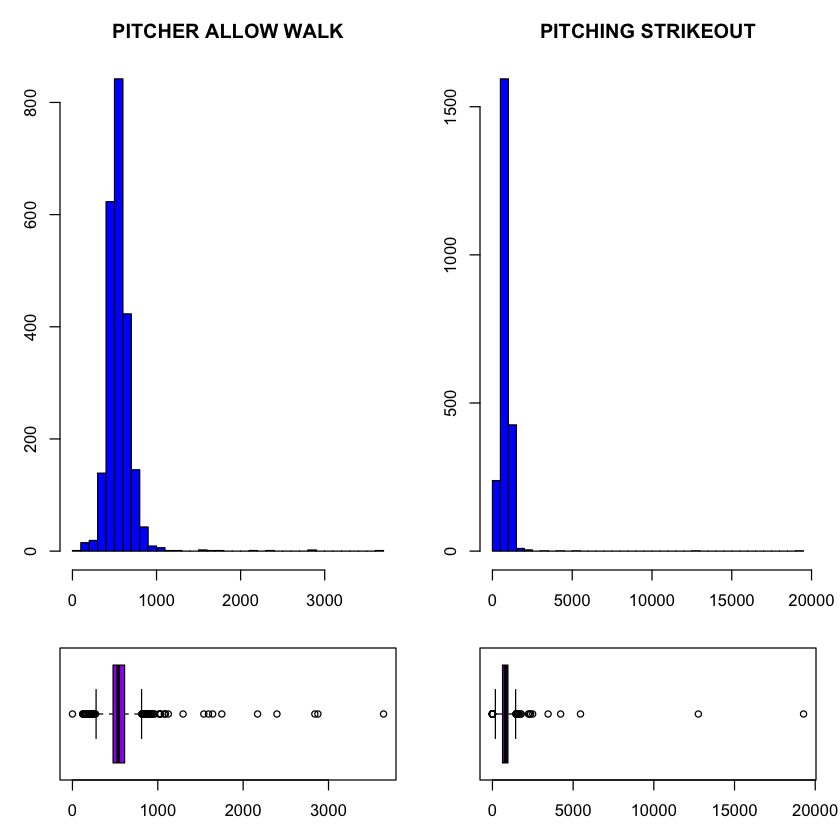

In [61]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TEAM_PITCHING_BB, main="PITCHER ALLOW WALK", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_PITCHING_SO, main="PITCHING STRIKEOUT", breaks=30, col="Blue")
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TEAM_PITCHING_BB, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_PITCHING_SO, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))

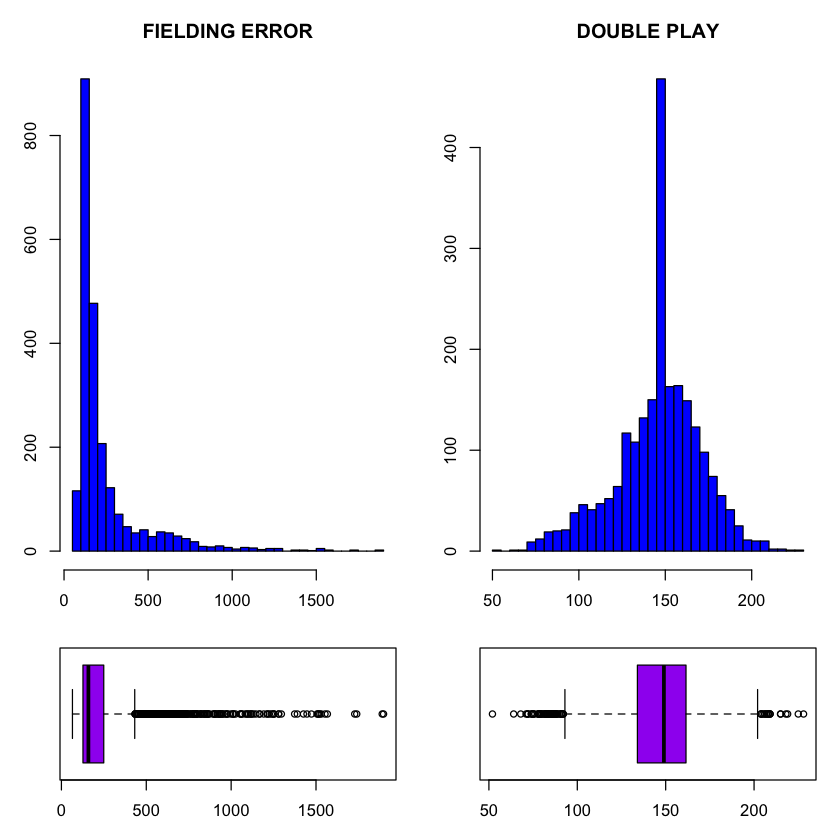

In [63]:
par(mfrow=c(2,2), mai=c(0.5,0.5,0.5,0.2))
par(fig=c(0,0.5,0.25,1))
hist(train$TEAM_FIELDING_E, main="FIELDING ERROR", breaks=30, col="Blue")
par(fig=c(0.5,1,0.25,1), new=TRUE)
hist(train$TEAM_FIELDING_DP, main="DOUBLE PLAY", breaks=30, col="Blue")
par(fig=c(0,0.5,0,0.3), new=TRUE)
boxplot(train$TEAM_FIELDING_E, horizontal=TRUE, width=1, col="Purple")
par(fig=c(0.5,1,0,0.3), new=TRUE)
boxplot(train$TEAM_FIELDING_DP, horizontal=TRUE, width=1, col="Purple")
par(mfrow=c(1,1))

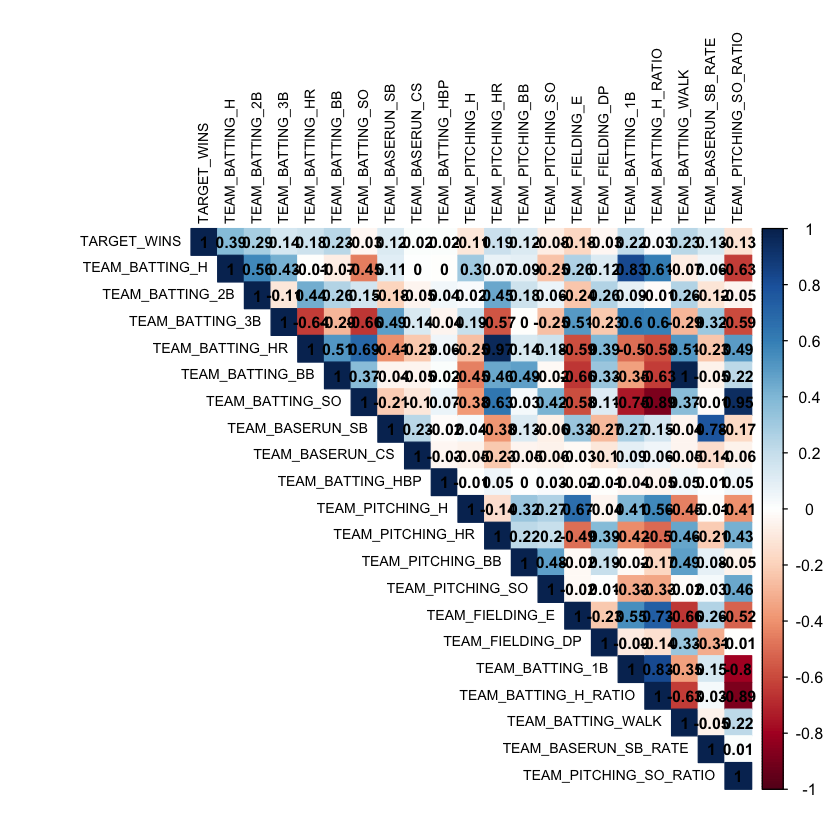

In [64]:
corrplot(cor(train[3:23], use="complete.obs"), method="color", type="upper", tl.col="black", tl.cex=.7, 
         addCoef.col="black", number.cex=.8)

* **With outliers included, TEAM_BATTING_H, TEAM_BATTING_1B, TEAM_BATTING_2B, TEAM_BATTING_BB, TEAM_BATTING_WALK seem to be more closely correlated with Target Wins compred to other variables.**

### 2. Data Preparation

In [65]:
## Determine Quantile to Trim Outliers
quantile(train$TEAM_BATTING_H, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_2B, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_3B, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_HR, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_BB, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_SO, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BASERUN_SB, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BASERUN_CS, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_HBP, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_PITCHING_H, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_PITCHING_HR, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_PITCHING_BB, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_PITCHING_SO, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_FIELDING_E, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_FIELDING_DP, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_1B, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_H_RATIO, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BATTING_WALK, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_BASERUN_SB_RATE, probs=c(0.01,0.025,0.975,0.99))
quantile(train$TEAM_PITCHING_SO_RATIO, probs=c(0.01,0.025,0.975,0.99))

1%     2.5%    97.5%      99% 
1193.250 1241.875 1773.125 1945.500

1%   2.5%  97.5%    99% 
141.75 156.00 335.00 351.25

1%    2.5%   97.5%     99% 
 17.000  20.000 118.125 133.250

1%   2.5%  97.5%    99% 
  4.75  10.00 216.00 235.00

1%    2.5%   97.5%     99% 
 79.000 161.750 704.125 752.750

1%    2.5%   97.5%     99% 
  72.00  286.25 1138.00 1191.25

1%    2.5%   97.5%     99% 
 24.000  30.000 366.125 434.250

1%    2.5%   97.5%     99% 
 18.750  23.000  97.125 123.500

1%  2.5% 97.5%   99% 
45.00 52.00 65.00 74.25

1%     2.5%    97.5%      99% 
1244.000 1284.000 4078.875 7054.000

1%  2.5% 97.5%   99% 
    8    14   227   244

1%   2.5%  97.5%    99% 
240.00 336.00 816.75 921.00

1%    2.5%   97.5%     99% 
 241.00  379.75 1277.00 1461.75

1%     2.5%    97.5%      99% 
  86.000   91.875  928.375 1228.000

1%    2.5%   97.5%     99% 
 80.000  88.000 191.125 202.000

1%     2.5%    97.5%      99% 
 881.000  901.000 1374.125 1558.250

1%      2.5%     97.5%       99% 
0.4280044 0.4376830 0.7355234 0.9049695

1%    2.5%   97.5%     99% 
137.000 219.750 762.125 807.750

1%      2.5%     97.5%       99% 
0.3848873 0.4302326 0.8819632 0.8986012

1%       2.5%      97.5%        99% 
0.03293516 0.11142942 0.35745967 0.36787623

In [66]:
##Trim out 1st and 99th 
#Replace Upper Outliers with 99th Cutoff Value
train99 <- train
train99$TEAM_BATTING_H[train99$TEAM_BATTING_H > 1945.500] <- 1945.500
train99$TEAM_BATTING_2B[train99$TEAM_BATTING_2B > 351.25] <- 351.25
train99$TEAM_BATTING_3B[train99$TEAM_BATTING_3B > 133.250] <- 133.250
train99$TEAM_BATTING_HR[train99$TEAM_BATTING_HR > 235.00] <- 235.00
train99$TEAM_BATTING_BB[train99$TEAM_BATTING_BB > 752.750] <- 752.750
train99$TEAM_BATTING_SO[train99$TEAM_BATTING_SO > 1191.25] <- 1191.25

train99$TEAM_BASERUN_SB[train99$TEAM_BASERUN_SB > 434.250] <- 434.250
train99$TEAM_BASERUN_CS[train99$TEAM_BASERUN_CS > 123.500] <- 123.500
train99$TEAM_BASERUN_SB[train99$TEAM_BATTING_HBP > 74.25] <- 74.25 
train99$TEAM_PITCHING_H[train99$TEAM_PITCHING_H > 7054.000] <- 7054.000
train99$TEAM_PITCHING_HR[train99$TEAM_PITCHING_HR > 244] <- 244
train99$TEAM_PITCHING_BB[train99$TEAM_PITCHING_BB > 921.00] <- 921.00
train99$TEAM_PITCHING_SO[train99$TEAM_PITCHING_SO > 1461.75] <- 1461.75 

train99$TEAM_FIELDING_E[train99$TEAM_FIELDING_E > 1228.000] <- 1228.000
train99$TEAM_FIELDING_DP[train99$TEAM_FIELDING_DP > 202.000] <- 202.000 

train99$TEAM_BATTING_1B[train99$TEAM_BATTING_1B > 1558.250] <- 1558.250
train99$TEAM_BATTING_H_RATIO[train99$TEAM_BATTING_H_RATIO > 0.9049695] <- 0.9049695
train99$TEAM_BATTING_WALK[train99$TEAM_BATTING_WALK > 807.750] <- 807.750
train99$TEAM_BASERUN_SB_RATE[train99$TEAM_BASERUN_SB_RATE > 0.8986116] <- 0.8986116
train99$TEAM_PITCHING_SO_RATIO[train99$TEAM_PITCHING_SO_RATIO > 0.36787623] <- 0.36787623

#Replace Lower Outliers with 1st Cutoff Value
train99$TEAM_BATTING_H[train99$TEAM_BATTING_H < 1193.250] <- 1193.250
train99$TEAM_BATTING_2B[train99$TEAM_BATTING_2B < 141.75] <- 141.75
train99$TEAM_BATTING_3B[train99$TEAM_BATTING_3B < 17.000] <- 17.000
train99$TEAM_BATTING_HR[train99$TEAM_BATTING_HR < 4.75] <- 4.75
train99$TEAM_BATTING_BB[train99$TEAM_BATTING_BB < 79.000] <- 79.000
train99$TEAM_BATTING_SO[train99$TEAM_BATTING_SO < 72.00] <- 72.00

train99$TEAM_BASERUN_SB[train99$TEAM_BASERUN_SB < 24.000] <- 24.000
train99$TEAM_BASERUN_CS[train99$TEAM_BASERUN_CS < 18.750] <- 18.750
train99$TEAM_BASERUN_SB[train99$TEAM_BATTING_HBP < 45.00] <- 45.00
train99$TEAM_PITCHING_H[train99$TEAM_PITCHING_H < 1244.000] <- 1244.000
train99$TEAM_PITCHING_HR[train99$TEAM_PITCHING_HR < 8] <- 8
train99$TEAM_PITCHING_BB[train99$TEAM_PITCHING_BB < 240.00] <- 240.00
train99$TEAM_PITCHING_SO[train99$TEAM_PITCHING_SO < 241.00] <- 241.00 

train99$TEAM_FIELDING_E[train99$TEAM_FIELDING_E < 86.000] <- 86.000
train99$TEAM_FIELDING_DP[train99$TEAM_FIELDING_DP < 80.000] <- 80.000

train99$TEAM_BATTING_1B[train99$TEAM_BATTING_1B < 881.000] <- 881.000
train99$TEAM_BATTING_H_RATIO[train99$TEAM_BATTING_H_RATIO < 0.4280044] <- 0.4280044
train99$TEAM_BATTING_WALK[train99$TEAM_BATTING_WALK < 137.000] <- 137.000
train99$TEAM_BASERUN_SB_RATE[train99$TEAM_BASERUN_SB_RATE < 0.3875000] <- 0.3875000
train99$TEAM_PITCHING_SO_RATIO[train99$TEAM_PITCHING_SO_RATIO < 0.03293516] <- 0.03293516

In [71]:
## Determine Quantile to Trim Outliers in Test dataset
quantile(test$TEAM_BATTING_H, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_2B, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_3B, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_HR, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_BB, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_SO, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BASERUN_SB, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BASERUN_CS, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_HBP, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_PITCHING_H, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_PITCHING_HR, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_PITCHING_BB, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_PITCHING_SO, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_FIELDING_E, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_FIELDING_DP, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_1B, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_H_RATIO, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BATTING_WALK, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_BASERUN_SB_RATE, probs=c(0.01,0.025,0.975,0.99))
quantile(test$TEAM_PITCHING_SO_RATIO, probs=c(0.01,0.025,0.975,0.99))

1%    2.5%   97.5%     99% 
1119.58 1209.00 1790.95 1934.52

1%   2.5%  97.5%    99% 
117.16 151.90 329.95 340.68

1%   2.5%  97.5%    99% 
 18.58  21.00 121.10 136.68

1%   2.5%  97.5%    99% 
  5.00   9.00 201.65 208.78

1%   2.5%  97.5%    99% 
 89.96 205.65 720.75 753.98

1%    2.5%   97.5%     99% 
  59.08  272.05 1096.20 1147.52

1%   2.5%  97.5%    99% 
 17.58  27.45 355.10 418.74

1%   2.5%  97.5%    99% 
 15.48  20.45 105.55 126.94

1%  2.5% 97.5%   99% 
50.74 57.70 64.65 73.42

1%    2.5%   97.5%     99% 
1209.00 1299.00 4021.90 8817.06

1%   2.5%  97.5%    99% 
  9.16  12.45 203.55 226.34

1%    2.5%   97.5%     99% 
 241.88  338.15  823.70 1131.04

1%    2.5%   97.5%     99% 
 319.64  363.70 1158.75 1279.34

1%    2.5%   97.5%     99% 
  93.00  100.45 1028.10 1239.54

1%   2.5%  97.5%    99% 
 81.32  92.45 191.65 202.42

1%    2.5%   97.5%     99% 
 894.06  922.45 1348.10 1508.28

1%      2.5%     97.5%       99% 
0.4310525 0.4503856 0.7208790 0.8977210

1%   2.5%  97.5%    99% 
151.96 267.65 782.75 815.98

1%      2.5%     97.5%       99% 
0.3430000 0.4706912 0.8772762 0.8940290

1%       2.5%      97.5%        99% 
0.02852929 0.10139808 0.35686341 0.37525962

In [72]:
##Trim out outliers using 1st and 99th in Test dataset
#Replace Upper Outliers with 99th Cutoff Value
test99 <- test
test99$TEAM_BATTING_H[test99$TEAM_BATTING_H > 1934.52] <- 1934.52
test99$TEAM_BATTING_2B[test99$TEAM_BATTING_2B > 340.68] <- 340.68
test99$TEAM_BATTING_3B[test99$TEAM_BATTING_3B > 136.68] <- 136.68
test99$TEAM_BATTING_HR[test99$TEAM_BATTING_HR > 208.78] <- 208.78
test99$TEAM_BATTING_BB[test99$TEAM_BATTING_BB > 753.98] <- 753.98
test99$TEAM_BATTING_SO[test99$TEAM_BATTING_SO > 1147.52] <- 1147.52

test99$TEAM_BASERUN_SB[test99$TEAM_BASERUN_SB > 418.74] <- 418.74
test99$TEAM_BASERUN_CS[test99$TEAM_BASERUN_CS > 126.94] <- 126.94
test99$TEAM_BASERUN_SB[test99$TEAM_BATTING_HBP > 73.42] <- 73.42 
test99$TEAM_PITCHING_H[test99$TEAM_PITCHING_H > 8817.06] <- 8817.06
test99$TEAM_PITCHING_HR[test99$TEAM_PITCHING_HR > 226.34] <- 226.34
test99$TEAM_PITCHING_BB[test99$TEAM_PITCHING_BB > 1131.04] <- 1131.04 
test99$TEAM_PITCHING_SO[test99$TEAM_PITCHING_SO > 1279.34] <- 1279.34

test99$TEAM_FIELDING_E[test99$TEAM_FIELDING_E > 1239.54] <- 1239.54
test99$TEAM_FIELDING_DP[test99$TEAM_FIELDING_DP > 202.42] <- 202.42

test99$TEAM_BATTING_1B[test99$TEAM_BATTING_1B > 1508.28] <- 1508.28
test99$TEAM_BATTING_H_RATIO[test99$TEAM_BATTING_H_RATIO > 0.8977210] <- 0.8977210
test99$TEAM_BATTING_WALK[test99$TEAM_BATTING_WALK > 815.98] <- 815.98 
test99$TEAM_BASERUN_SB_RATE[test99$TEAM_BASERUN_SB_RATE > 0.8941337] <- 0.8941337
test99$TEAM_PITCHING_SO_RATIO[test99$TEAM_PITCHING_SO_RATIO > 0.37525962] <- 0.37525962

#Replace Lower Outliers with 1st Cutoff Value
test99$TEAM_BATTING_H[test99$TEAM_BATTING_H < 1119.58] <- 1119.58
test99$TEAM_BATTING_2B[test99$TEAM_BATTING_2B < 117.16] <- 117.16
test99$TEAM_BATTING_3B[test99$TEAM_BATTING_3B < 18.58] <- 18.58
test99$TEAM_BATTING_HR[test99$TEAM_BATTING_HR < 5.00] <- 5.00
test99$TEAM_BATTING_BB[test99$TEAM_BATTING_BB < 89.96] <- 89.96
test99$TEAM_BATTING_SO[test99$TEAM_BATTING_SO < 59.08] <- 59.08

test99$TEAM_BASERUN_SB[test99$TEAM_BASERUN_SB < 17.58] <- 17.58
test99$TEAM_BASERUN_CS[test99$TEAM_BASERUN_CS < 15.48] <- 15.48
test99$TEAM_BASERUN_SB[test99$TEAM_BATTING_HBP < 50.74] <- 50.74
test99$TEAM_PITCHING_H[test99$TEAM_PITCHING_H < 1209.00] <- 1209.00
test99$TEAM_PITCHING_HR[test99$TEAM_PITCHING_HR < 9.16] <- 9.16 
test99$TEAM_PITCHING_BB[test99$TEAM_PITCHING_BB < 241.88] <- 241.88
test99$TEAM_PITCHING_SO[test99$TEAM_PITCHING_SO < 319.64] <- 319.64

test99$TEAM_FIELDING_E[test99$TEAM_FIELDING_E < 93.00] <- 93.00
test99$TEAM_FIELDING_DP[test99$TEAM_FIELDING_DP < 81.32] <- 81.32

test99$TEAM_BATTING_1B[test99$TEAM_BATTING_1B < 894.06] <- 894.06
test99$TEAM_BATTING_H_RATIO[test99$TEAM_BATTING_H_RATIO < 0.4310525] <- 0.4310525
test99$TEAM_BATTING_WALK[test99$TEAM_BATTING_WALK < 151.96] <- 151.96
test99$TEAM_BASERUN_SB_RATE[test99$TEAM_BASERUN_SB_RATE < 0.4016864] <- 0.4016864
test99$TEAM_PITCHING_SO_RATIO[test99$TEAM_PITCHING_SO_RATIO < 0.02852929] <- 0.02852929

* **Review Correlation Chart following w/o NAs**

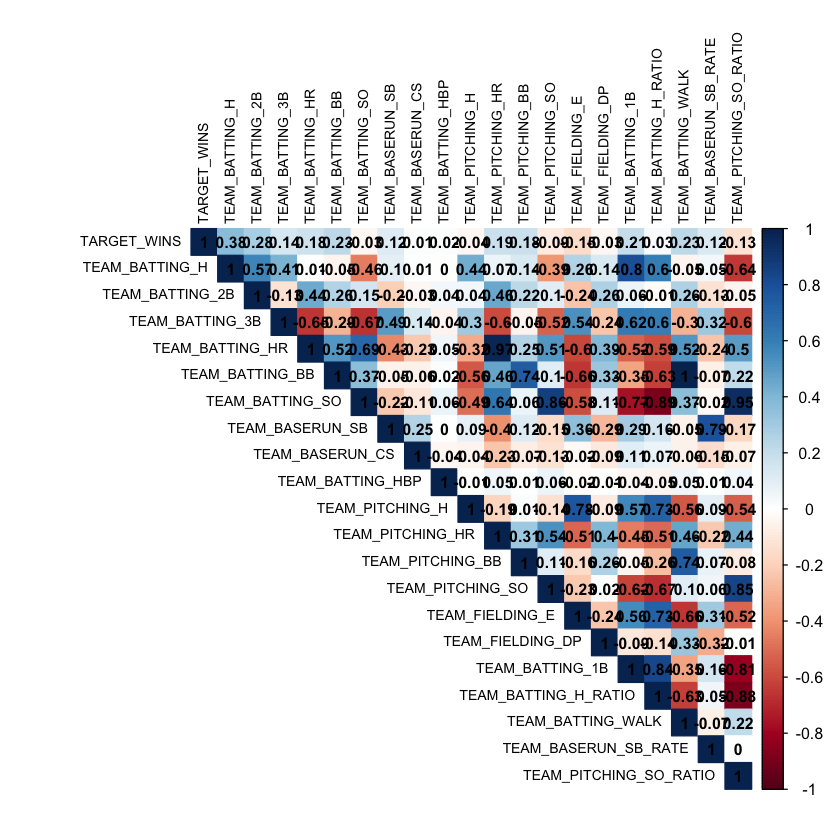

In [73]:
corrplot(cor(train99[3:23]), method="color", type="upper", tl.col="black", tl.cex=.7, 
         addCoef.col="black", number.cex=.8)

# 3. Build Models

In [74]:
# Model 1 Testing TARGET_WINS & TEAM_BATTING_3B
model_1 <- lm(TARGET_WINS ~TEAM_BATTING_3B, data = train99)
summary(model_1)
coef(model_1)


Call:
lm(formula = TARGET_WINS ~ TEAM_BATTING_3B, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.602  -9.127   1.090  10.696  60.519 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     76.17690    0.74316 102.504  < 2e-16 ***
TEAM_BATTING_3B  0.08382    0.01212   6.913 6.14e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.59 on 2274 degrees of freedom
Multiple R-squared:  0.02058,	Adjusted R-squared:  0.02015 
F-statistic: 47.79 on 1 and 2274 DF,  p-value: 6.14e-12


(Intercept) TEAM_BATTING_3B 
    76.17690091      0.08381938

In [75]:
# Model 2 Testing TARGET_WINS & TEAM_BATTING_H_RATIO
model_2 <- lm(TARGET_WINS ~TEAM_BATTING_H_RATIO, data = train99)
summary(model_2)
coef(model_2)


Call:
lm(formula = TARGET_WINS ~ TEAM_BATTING_H_RATIO, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.937  -9.491   1.127  10.661  63.063 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            77.655      2.242  34.639   <2e-16 ***
TEAM_BATTING_H_RATIO    5.837      4.127   1.414    0.157    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.75 on 2274 degrees of freedom
Multiple R-squared:  0.0008788,	Adjusted R-squared:  0.0004395 
F-statistic:     2 on 1 and 2274 DF,  p-value: 0.1574


(Intercept) TEAM_BATTING_H_RATIO 
           77.654830             5.837095

In [76]:
# Model 3 Testing TARGET_WINS & TEAM_BATTING_WALK
model_3 <- lm(TARGET_WINS ~TEAM_BATTING_WALK, data = train99)
summary(model_3)
coef(model_3)


Call:
lm(formula = TARGET_WINS ~ TEAM_BATTING_WALK, data = train99)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.220  -9.769   0.511   9.827  77.780 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       64.143386   1.520052   42.20   <2e-16 ***
TEAM_BATTING_WALK  0.029753   0.002655   11.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.34 on 2274 degrees of freedom
Multiple R-squared:  0.05233,	Adjusted R-squared:  0.05191 
F-statistic: 125.6 on 1 and 2274 DF,  p-value: < 2.2e-16


(Intercept) TEAM_BATTING_WALK 
      64.14338649        0.02975272

**After running three models comparing Batting Triples, Overall Hitting Ratio, and Total Walk against Target Wins,I chose to keep Model_3. Comparing across three models, Model_3 resulted in a smallest P-Value at 2e-16. Being closest to zero and less than 0.05, I can reject the null hypothesis. Total Walk occuring during Batting either by batters walking due to 4 ball or being hit by pitch is correlated with Target Win.**

In [77]:
df_train <- train[ , c("INDEX", "TEAM_BATTING_WALK","TARGET_WINS")]
p <- predict(model_3, df_train)
P_TARGET_WINS <- predict(model_3, test99)
P_TARGET_WINS

1        2        3        4        5        6        7        8 
79.28752 81.34046 81.13219 79.85282 68.81456 72.38489 82.88760 76.58002 
       9       10       11       12       13       14       15       16 
79.85282 79.43629 80.71565 79.73381 81.19170 80.95367 80.41813 78.90074 
      17       18       19       20       21       22       23       24 
80.59664 82.59007 77.38335 81.66774 84.67276 84.70252 85.41658 81.84626 
      25       26       27       28       29       30       31       32 
78.57346 80.41813 68.66461 77.44285 84.85128 78.84123 87.35051 84.73227 
      33       34       35       36       37       38       39       40 
87.49927 88.42101 81.81650 83.66117 82.23304 81.78675 82.85785 80.86442 
      41       42       43       44       45       46       47       48 
83.80994 84.52400 68.66461 88.42101 84.28598 83.63142 81.63799 78.36519 
      49       50       51       52       53       54       55       56 
78.98999 79.37678 78.24618 81.37021 80.83466 78.33543 80.00159 78.39494 
      57       58       59       60       61       62       63       64 
82.82810 77.65112 78.69247 79.22802 80.68590 87.94556 83.03636 80.86442 
      65       66       67       68       69       70       71       72 
79.43629 80.47763 77.17508 76.22299 81.04293 84.19672 80.20986 79.91233 
      73       74       75       76       77       78       79       80 
83.42315 82.50082 77.26434 80.09085 84.94054 80.50738 77.38335 77.59162 
      81       82       83       84       85       86       87       88 
82.44131 80.47763 82.08428 82.02477 85.59510 79.88258 81.04293 81.87601 
      89       90       91       92       93       94       95       96 
85.35708 84.73227 81.54873 76.31225 78.81148 76.10398 78.57346 80.35862 
      97       98       99      100      101      102      103      104 
87.29100 84.31573 84.73227 84.49425 80.86442 81.90576 81.81650 84.13722 
     105      106      107      108      109      110      111      112 
82.23304 73.78327 74.88412 80.12060 83.51241 76.69904 83.57191 80.80491 
     113      114      115      116      117      118      119      120 
81.10244 79.13876 77.88914 80.89417 81.99502 81.28095 78.63296 78.12717 
     121      122      123      124      125      126      127      128 
81.51898 78.93049 76.93706 76.10398 79.58505 76.60978 79.76357 77.59162 
     129      130      131      132      133      134      135      136 
81.87601 81.04293 83.36364 83.89919 80.20986 81.66774 81.93551 73.69401 
     137      138      139      140      141      142      143      144 
80.86442 78.93049 81.19170 82.50082 75.03288 77.65112 84.13722 81.99502 
     145      146      147      148      149      150      151      152 
84.13722 82.47106 82.47106 83.95870 81.63799 80.92392 80.89417 81.04293 
     153      154      155      156      157      158      159      160 
68.66461 76.49077 82.26279 78.96024 82.26279 75.68744 79.34703 78.98999 
     161      162      163      164      165      166      167      168 
86.13065 88.42101 85.53559 88.03482 88.18359 85.47609 83.57191 81.31071 
     169      170      171      172      173      174      175      176 
78.69247 81.93551 81.37021 82.79834 82.79834 83.24463 81.93551 84.91079 
     177      178      179      180      181      182      183      184 
87.35051 81.01318 82.05453 84.34548 83.72068 83.63142 83.24463 84.28598 
     185      186      187      188      189      190      191      192 
73.69401 77.62137 85.32732 72.92044 75.62794 83.03636 77.94865 78.87098 
     193      194      195      196      197      198      199      200 
74.91387 78.06766 78.87098 80.03134 79.76357 86.39842 84.28598 83.92895 
     201      202      203      204      205      206      207      208 
80.77516 81.16194 81.51898 82.73884 81.04293 85.02980 82.61983 81.42972 
     209      210      211      212      213      214      215      216 
81.31071 81.22145 82.08428 78.42469 82.41156 81.19170 80.71565 81.19170 
     217      218      219      220      221      222      223   

In [78]:
df_out <- data.frame(p,train99$TARGET_WINS,train99$INDEX)
head(df_out, n=5)

p,train99.TARGET_WINS,train99.INDEX
70.12368,39,1
86.24966,70,2
83.78018,86,3
79.28752,70,4
79.91233,82,5


In [79]:
mse <- sqrt(mean((p - df_out$train99.TARGET_WINS)^2, na.rm=TRUE))
round(mse, digits = 0)

[1] 15

In [80]:
df_test_out <- data.frame(P_TARGET_WINS,test$INDEX)
head(df_test_out, n=5)

P_TARGET_WINS,test.INDEX
79.28752,9
81.34046,10
81.13219,14
79.85282,47
68.81456,60


In [82]:
write.csv(df_test_out, '/Users/juhwikim/Desktop/MSDS/410 Supervised Learning/MA1_Output.csv', row.names = TRUE)

# 4. Model Equations

**Formula for added metrics**
* TEAM_BATTING_1B: TEAM_BATTING_H - TEAM_BATTING_2B - TEAM_BATTING_3B - TEAM_BATTING_HR
* TEAM_BATTING_H_RATIO: TEAM_BATTING_H / (TEAM_BATTING_H + TEAM_BATTING_BB + TEAM_BATTING_HBP + TEAM_BATTING_SO)
* TEAM_BATTING_WALK: TEAM_BATTING_BB + TEAM_BATTING_HBP
* TEAM_BASERUN_SB_RATE: TEAM_BASERUN_SB / (TEAM_BASERUN_SB + TEAM_BASERUN_CS)
* TEAM_PITCHING_SO_RATIO: TEAM_PITCHING_SO / (TEAM_PITCHING_SO + TEAM_PITCHING_BB + TEAM_PITCHING_H + TEAM_PITCHING_HR)

### Equation for Model#3:
Yi = 64.143386 + 0.029753 * Xi + Ei
- E ~ N(0, 15.34**2)